# Домашнее задание по обучению сверточной сети

В этом задании вы сами (с небольшой помощью) обучите нейронную сеть для классификации кошек и собак!

Ниже приводится код для считывания данных аналогичный прошлому уроку, поэтому можете его просто запустить.

*Не забудьте добавить в Runtime GPU для ускорения вычислений*.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
! ls /root/.keras/datasets/cats_and_dogs_filtered

train  validation  vectorize.py


In [ ]:
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

In [ ]:
num_cats_tr = len(list(train_cats_dir.glob("*")))
num_dogs_tr = len(list(train_dogs_dir.glob("*")))

num_cats_val = len(list(validation_cats_dir.glob("*")))
num_dogs_val = len(list(validation_dogs_dir.glob("*")))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, sample_labels = next(train_data_gen)

In [ ]:
_val_images, _val_labels = next(val_data_gen)
next(val_data_gen)[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
def show_catsdogs(images, labels, predicted_labels=None):
    names = {0: "Cat", 1: "Dog"}
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

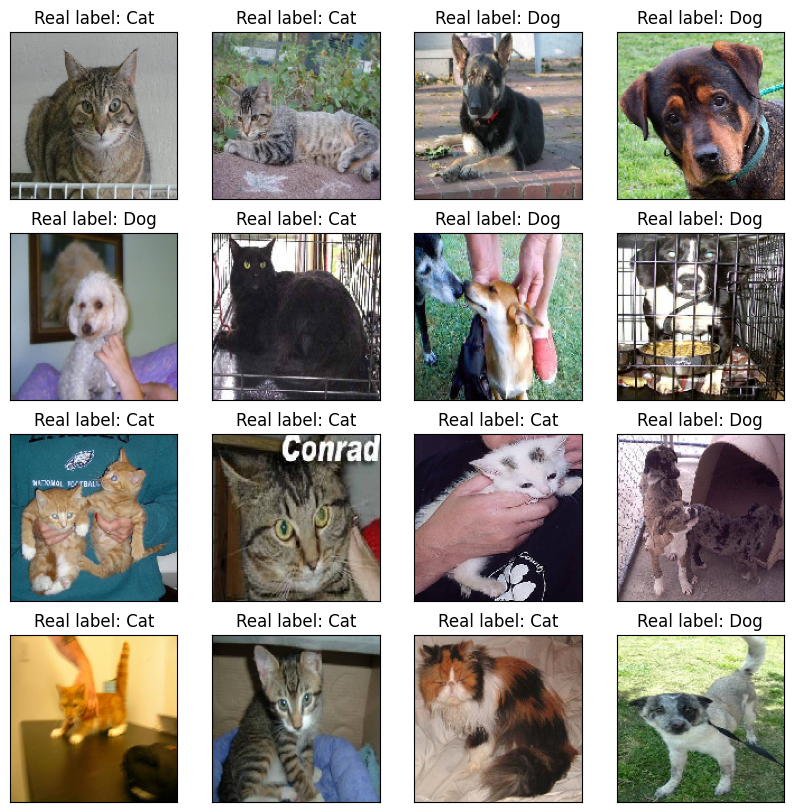

In [ ]:
show_catsdogs(sample_training_images, sample_labels)

# Определение модели

**Задание**

Определите модель аналогично модели из урока с классификации одежды.

1. Используйте сверточные слои с размером фильтра (3,3) и relu активацией. Можно оставить паддинг по умолчанию.
2. После каждого сверточного слоя применяйте MaxPool, уменьшающий размер в два раза
3. Увеличивайте количество фильтров в два раза после каждого пуллинга до 128, начиная с 32. Таким образом вы добывите три блока conv+pool
4. Добавьте еще один conv+pool блок с 128 фильтрами
5. Используйте Flatten(), чтобы превратить последний тензор в вектор
6. Добавьте полносвязный слой на 128 признаков
7. Добавьте выходной слой с активацией sigmoid



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 289ms/step - accuracy: 0.4953 - loss: 1.4943 - val_accuracy: 0.5030 - val_loss: 0.6911
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.5284 - loss: 0.6884 - val_accuracy: 0.6070 - val_loss: 0.6829
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.5923 - loss: 0.6721 - val_accuracy: 0.5440 - val_loss: 0.6727
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.6190 - loss: 0.6496 - val_accuracy: 0.6570 - val_loss: 0.6189
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.7199 - loss: 0.5580 - val_accuracy: 0.6610 - val_loss: 0.6292
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s

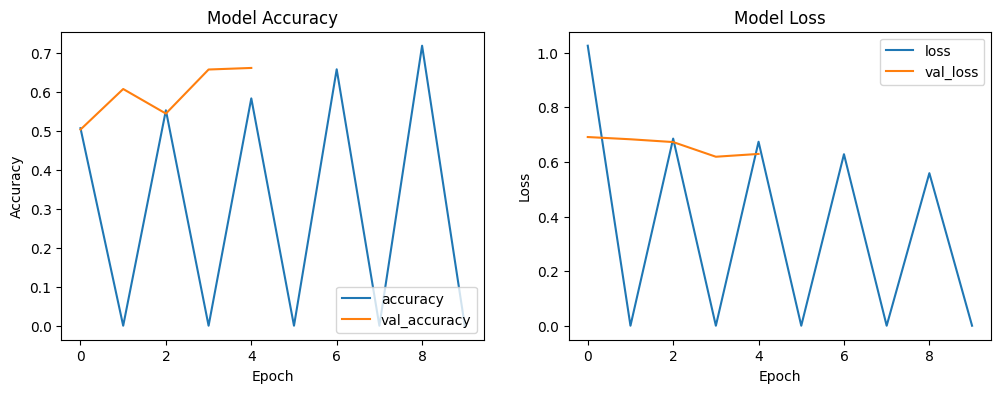

In [ ]:
# < YOUR CODE STARTS HERE >
# Step 1: Build a CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Step 2: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(train_data_gen,
                    steps_per_epoch=total_train // BATCH_SIZE,
                    validation_data=val_data_gen,
                    validation_steps=total_val // BATCH_SIZE,
                    epochs=10)  # Adjust epochs as needed

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(val_data_gen, steps=total_val // BATCH_SIZE)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()
# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
# должно получиться около 1 000 000 параметров
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# для более удобного и наглядного отображения обучения мы воспользуемся библиотекой,
# которая реализует коллбек, отображающий кривые обучения в режиме реального времени.
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 0.7310 - loss: 0.5513 - val_accuracy: 0.6990 - val_loss: 0.5932
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.7642 - loss: 0.4771 - val_accuracy: 0.6950 - val_loss: 0.5990
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.8202 - loss: 0.3937 - val_accuracy: 0.7290 - val_loss: 0.6046
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.8598 - loss: 0.3366 - val_accuracy: 0.7260 - val_loss: 0.6155
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.8742 - loss: 0.3026 - val_accuracy: 0.7330 - val_loss: 0.6166
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9139 - loss: 0.2173 - val_accuracy: 0.7290 - val_loss: 0.6893
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9459 - loss: 0.1581 - val_accuracy: 0.6960 - val_loss: 0.9134
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.9332 - loss: 0.1813 - val_accuracy: 

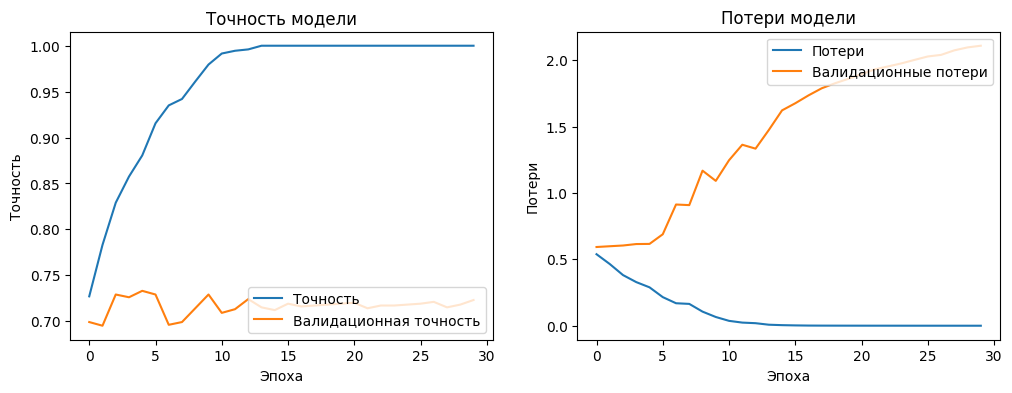

In [ ]:
# Количество эпох
EPOCHS = 30

# Обучение модели
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen
)

# После обучения нарисуем графики потерь и точности
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.title('Точность модели')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери')
plt.plot(history.history['val_loss'], label='Валидационные потери')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper right')
plt.title('Потери модели')

plt.show()

Теперь посмотрим на предсказания нашей сети:

Found 1000 images belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


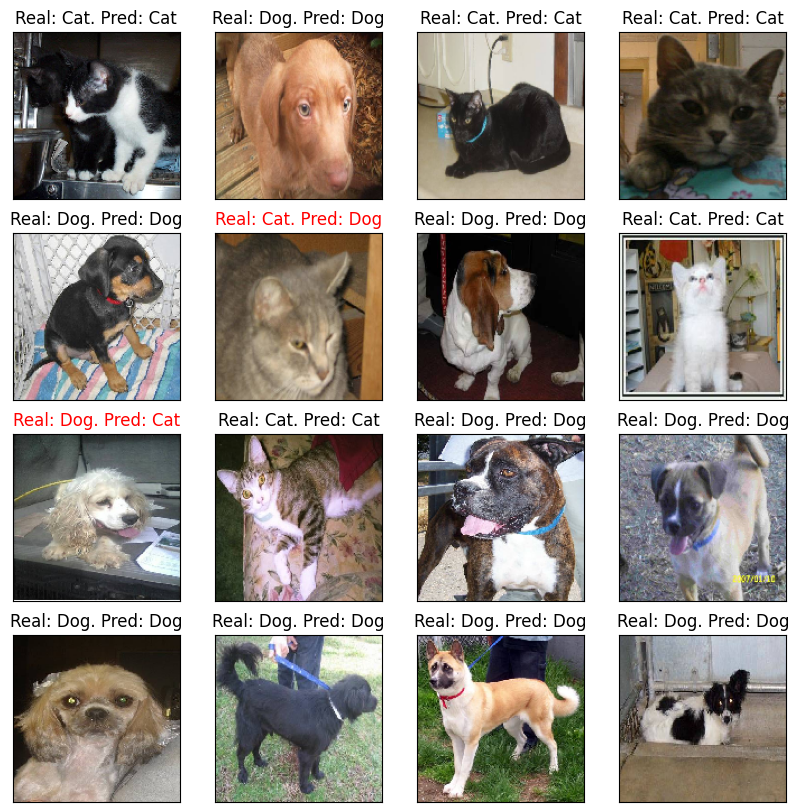

In [ ]:

shuffle_val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)
sample_validation_images, sample_validation_labels = next(shuffle_val_data_gen)

predicted_probabilities = model.predict(sample_validation_images)
predicted = (predicted_probabilities > 0.5).astype("int32").flatten()  # Приведем к 0 и 1

show_catsdogs(sample_validation_images, sample_validation_labels, predicted)


 # Заключение

 В этом задании вы получили классификатор кошек и собак, который имеет точность на валидации около 75%. Поздравляем!

Но вы не могли не заметить, что точность на трейне -- 100%. Это явный признак переобучения. Сможем ли мы избавиться от переобучения? Увидим с следующем уроке.